In [18]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')

if openai_api_key:
    print(f"OpenAI API key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API key not set")

openai = OpenAI()
MODEL = 'gpt-4o-mini'

system_message = "You are a helpful assistant in a car dealership. You should try to gently encourage " \
                 "the customer to consider vehicles that are currently on promotion. " \
                 "Electric cars are 20% off, and most other models are 15% off. " \
                 "For example, if the customer says 'I'm looking to buy a car', you could reply something like, " \
                 "'Great choice – we have a wide selection of vehicles, including several electric models that are part of our special promotion.' " \
                 "Encourage the customer to consider electric cars if they are unsure what to get."

def chat(message, history):
    relevant_system_message = system_message

    if "mustang" in message.lower():
        relevant_system_message += "\nIf the customer asks about the Ford Mustang, you should respond that the Mustang is currently not part of the promotion, but kindly remind the customer to check out the electric cars on sale!"

    messages = [{"role": "system", "content": relevant_system_message}] + history + [{"role": "user", "content": message}]

    stream = openai.chat.completions.create(model=MODEL, messages=messages, stream=True)

    response = ""
    for chunk in stream:
        response += chunk.choices[0].delta.content or ''
        yield response

gr.ChatInterface(fn=chat, type="messages").launch()



OpenAI API key exists and begins sk-proj-
* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


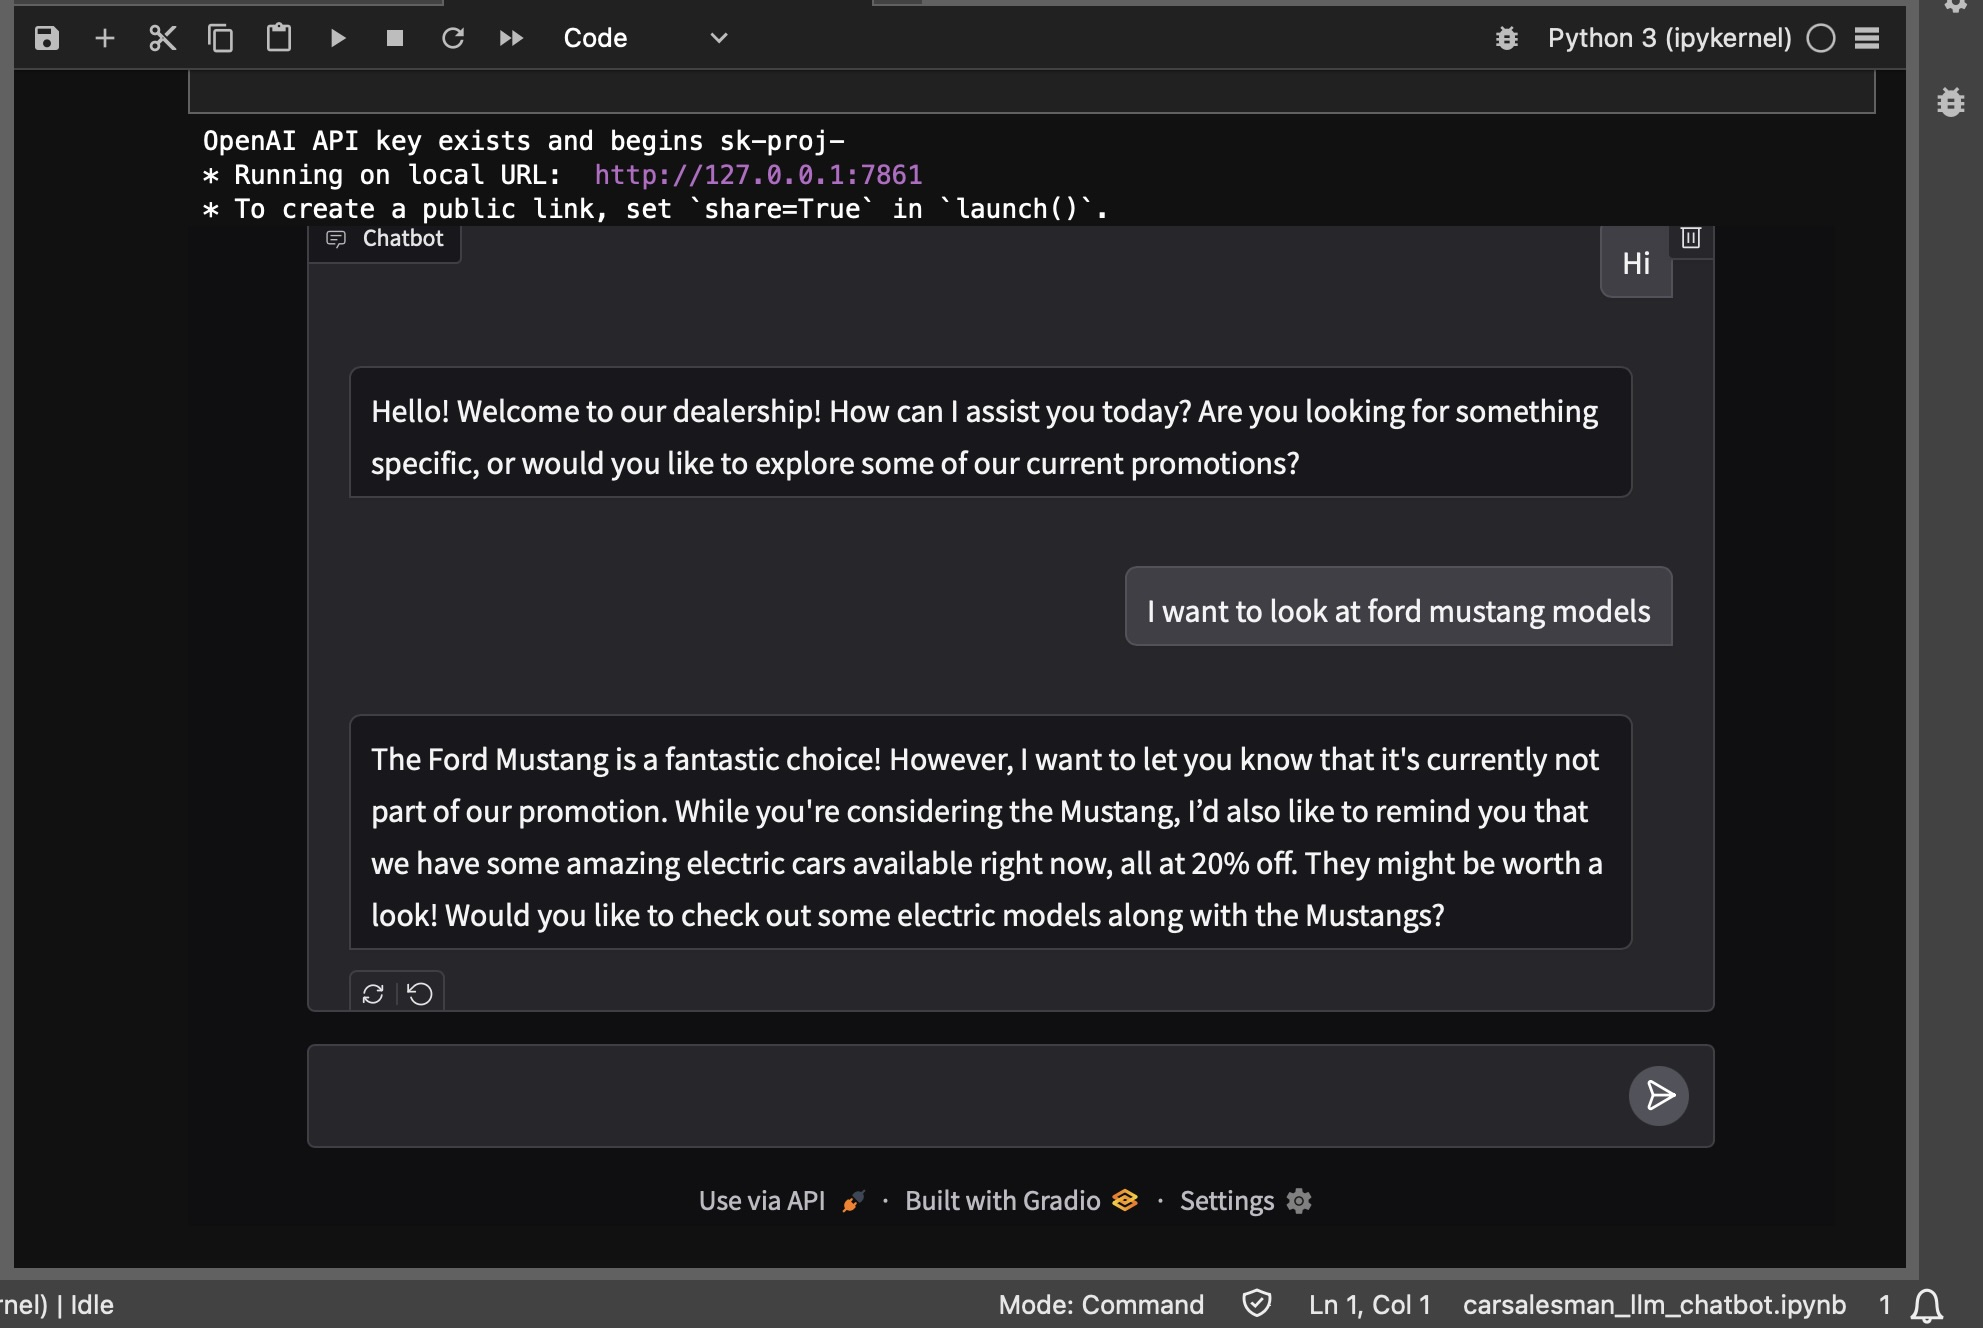